In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import urllib.request as ulib
from urllib.request import Request, urlopen
import bs4
import pickle
#POur la partie Database
import mysql.connector
import sqlite3


<div style="display: flex; background-color: RGB(252,190,3);" >
<h1 style="margin: auto; padding: 20px;  ">Partie 1 : Scrapping Presse et stockage des données</h1>
</div>  

<div style="display: flex; background-color: RGB(143, 166, 158);" >
<h3 style="margin: auto; padding: 10px;  "> Base de données SQLite3  </h3>
</div> 

In [73]:
#Je crée la variable connexion pour accéder à la BDD  ou créer la BDD presses.db
connection = sqlite3.connect("presses.db")
# Ajout du cursor pour interagir avec la BDD
cursor = connection.cursor()
print(type(cursor))

<class 'sqlite3.Cursor'>


In [74]:
# 1 -CREATION DE LA TABLE Article
cursor.execute("CREATE TABLE article (article_id  INT AUTO_INCREMENT PRIMARY KEY, contenu  VARCHAR(8000),  titre VARCHAR(3000), len_article  int,  nom_journal  VARCHAR(255))") 
connection.commit()


In [75]:
#Création de la table journal
cursor.execute("CREATE TABLE journal (journal_id  INT AUTO_INCREMENT PRIMARY KEY, nom_journal VARCHAR(255),  parution  VARCHAR(255), fondateur VARCHAR(255))") 
connection.commit()

In [76]:
#Fermeture de la connexion
connection.close()

<div style="display: flex; background-color: RGB(143, 166, 158);" >
<h2 style="margin: auto; padding: 10px;  "> Scrapping </h2>
</div> 

In [77]:
#Fonction qui prend en argument l'url de la page web à ouvrir
def get_html(source):
    with ulib.urlopen(source) as u:
        return bs4.BeautifulSoup(u.read().decode('utf-8'), 'html.parser')


<div style="display: flex; background-color: RGB(3,190,252);" >
<h1 style="margin: auto; padding: 10px;  "> Le monde </h1>
</div> 


In [78]:
# La listes des pages du mondes à scrapper

sources = ['https://www.lemonde.fr/international/', 'https://www.lemonde.fr/politique/', 'https://www.lemonde.fr/societe/',
 'https://www.lemonde.fr/afrique/', 'https://www.lemonde.fr/les-decodeurs/', 'https://www.lemonde.fr/sport/',
 'https://www.lemonde.fr/planete/', 'https://www.lemonde.fr/sciences/', 'https://www.lemonde.fr/campus/',
 'https://www.lemonde.fr/sante/', 'https://www.lemonde.fr/big-browser/', 'https://www.lemonde.fr/pixels/',
'https://www.lemonde.fr/disparitions/', 'https://www.lemonde.fr/cinema/', 'https://www.lemonde.fr/livres/',
 'https://www.lemonde.fr/musiques/', 'https://www.lemonde.fr/televisions-radio/', 'https://www.lemonde.fr/m-actu/']


In [79]:
# Stocke le contenu de la requête ds une variable page et liste les liens vers les articles sur chaque page
links=[]
for url in sources:
    print(url)
    page = get_html(url)
    
    for i in  page.findAll('div', {'class' : 'thread'}):
        links.append(i.find('a').get("href"))


https://www.lemonde.fr/international/
https://www.lemonde.fr/politique/
https://www.lemonde.fr/societe/
https://www.lemonde.fr/afrique/
https://www.lemonde.fr/les-decodeurs/
https://www.lemonde.fr/sport/
https://www.lemonde.fr/planete/
https://www.lemonde.fr/sciences/
https://www.lemonde.fr/campus/
https://www.lemonde.fr/sante/
https://www.lemonde.fr/big-browser/
https://www.lemonde.fr/pixels/
https://www.lemonde.fr/disparitions/
https://www.lemonde.fr/cinema/
https://www.lemonde.fr/livres/
https://www.lemonde.fr/musiques/
https://www.lemonde.fr/televisions-radio/
https://www.lemonde.fr/m-actu/


In [80]:
#Le nombre de liens renvoyant vers les articles
len(links)
    

1060

In [81]:
# Affichage d'un lien
links[33]

'https://www.lemonde.fr/campus/article/2022/03/19/nous-vivons-avec-ce-desespoir-d-etre-impuissants-a-la-cite-internationale-les-etudiants-ukrainiens-veulent-se-sentir-utiles_6118271_4401467.html'

In [84]:
# Connection à la base de données 
connection = sqlite3.connect("presses.db")
cursor = connection.cursor()


# Reccupération des articles 
# Liste pour stocker les articles
list_articles = [] 
for link in links: 
    page = get_html(link)
    title = page.find('h1').getText()
    article=""
    for t in  page.findAll("p", {'class': "article__paragraph"}):
        article += t.text.replace('\xa0','') 
    for t in  page.findAll("p", {'class': "article__desc"}):
        article += t.text.replace('\xa0','') 
    length=len(article.split())
    if length < 20:
        print(title, length)
  
    elif length >=20:
        # Stocke les articles dans une liste
        list_articles.append((title,article,length,"Le Monde"))
        # Insertion de lignes, une ligne par article dans la base de données :
        # 1-Insertion dans la table article
        new_article = (cursor.lastrowid, article, title, length, "Le Monde")
        cursor.execute("INSERT INTO article VALUES(?,?,?,?,?)", new_article)
        connection.commit()
        #2- Insertion dans la table journal
        new_journal = (cursor.lastrowid, "Le Monde", "Quotitien", "Hubert Beuve-Méry")
        cursor.execute("INSERT INTO journal VALUES(?,?,?,?)", new_journal)
        connection.commit()
        
        
#Fermeture de la connexion      
connection.close()

Guerre en Ukraine, en direct : au moins 8 morts dans le bombardement d’un centre commercial à Kiev, Marioupol refuse de capituler 0
Le programme d’Emmanuel Macron pour la présidentielle 2022 0
Le programme d’Emmanuel Macron pour la présidentielle 2022 0
C’est quoi, un « club historique » ? 0
Energies fossiles, une addiction ? 0
Triomphe d’« Illusions perdues », hommage à Gaspard Ulliel : revivez les moments fort de la cérémonie des Césars 2022 0


In [85]:
# Nombre  total d'articles
len(list_articles)

1054

In [86]:
# Affichage d'un article pour vérif 
list_articles[33]

('En Ukraine, des missiles hypersoniques utilisés par la Russie pour la première fois, selon Moscou',
 'L’armée russe a affirmé, samedi 19mars, avoir tiré des missiles hypersoniques en Ukraine, un recours en combat qui semble être une première, en pleine course mondiale pour se doter de ces armes qualifiées d’«invincibles» par Vladimir Poutine. «Le 18mars, le complexe aéronautique Kinjal avec ses missiles balistiques hypersoniques a détruit un important entrepôt souterrain de missiles et de munitions de l’aviation de l’armée ukrainienne dans la localité de Deliatine, dans la région d’Ivano-Frankivsk» dans l’ouest de l’Ukraine, a annoncé le porte-parole du ministère de la défense, Igor Konachenkov.La Russie n’avait, jusque-là, jamais fait état de l’emploi de ce missile balistique dans les deux conflits où elle est belligérante, l’Ukraine et la Syrie. Il a été déployé de nombreuses fois lors d’exercices depuis le premier test réussi en2018.«Il est probable qu’on voulait utiliser le Kinja

In [89]:
#Stockage des données ds un dataframe 
data_monde1 = pd.DataFrame(list_articles, columns = ['titre', 'article', 'length_article', 'source'])

In [90]:
data_monde1

,titre,article,length_article,source
0,« Les étrangers réfugiés en France comprennent...,Tribune. La guerre en Ukraine suscite un élan ...,504,Le Monde
1,Election présidentielle 2022 : « Une réélectio...,"Tribune. Habituellement, les enjeux de politiq...",472,Le Monde
2,Guerre en Ukraine : avec les volontaires de la...,"Dans la cour de la caserne, une douzaine de bo...",494,Le Monde
3,Crimes de guerre en Ukraine : la chasse aux pr...,Vladimir Poutine commet-il des crimes de guerr...,199,Le Monde
4,Guerre en Ukraine : Kiev rejette l’ultimatum r...,L’Ukraine ne «déposera pas les armes et ne qui...,637,Le Monde
...,...,...,...,...
1049,"A Paris, les squatteurs de La Clef veulent s’o...","«Expulsion immédiate, des films tout le temps»...",605,Le Monde
1050,"L’acteur George Takei, mémoire vive de l’inter...","A 84ans, George Takei est toujours en mission....",447,Le Monde
1051,"Grâce au sculpteur Charles Ray, une collaborat...",La Bourse de commerce est tellement proche du ...,359,Le Monde
1052,« Vieux mais pas bête » : la croisade d’un méd...,«Vieux mais pas bête.» Le slogan brandi par le...,380,Le Monde


In [91]:
# Affichage pour vérifier  que tous les articles ont bien un contenu
list(data_monde1['length_article'])

[504,
 472,
 494,
 199,
 637,
 445,
 470,
 425,
 330,
 410,
 90,
 421,
 190,
 341,
 411,
 428,
 515,
 453,
 472,
 725,
 445,
 559,
 533,
 478,
 435,
 328,
 516,
 413,
 444,
 429,
 93,
 341,
 842,
 731,
 466,
 143,
 480,
 773,
 448,
 586,
 489,
 400,
 413,
 456,
 437,
 390,
 452,
 2678,
 447,
 482,
 431,
 465,
 480,
 638,
 91,
 375,
 491,
 965,
 403,
 419,
 236,
 403,
 472,
 415,
 397,
 435,
 621,
 390,
 390,
 127,
 304,
 464,
 417,
 622,
 909,
 752,
 773,
 435,
 439,
 1198,
 1058,
 541,
 491,
 629,
 671,
 484,
 536,
 441,
 451,
 291,
 568,
 866,
 540,
 713,
 416,
 481,
 422,
 430,
 459,
 510,
 438,
 465,
 615,
 694,
 441,
 477,
 425,
 275,
 488,
 436,
 435,
 395,
 458,
 466,
 466,
 371,
 384,
 405,
 419,
 418,
 407,
 415,
 421,
 744,
 390,
 515,
 390,
 433,
 464,
 429,
 348,
 317,
 591,
 457,
 452,
 621,
 405,
 564,
 491,
 629,
 404,
 522,
 405,
 417,
 422,
 430,
 465,
 441,
 408,
 458,
 466,
 466,
 371,
 423,
 442,
 971,
 678,
 552,
 429,
 525,
 393,
 390,
 581,
 492,
 490,
 454,
 403

In [94]:
# SAuvegarde de la data ds un fichier CSV 
data_monde1.to_csv("data_monde_21_mars.csv")

<div style="display: flex; background-color: RGB(255, 255, 255) ;" >
<h1 style="color: RGB(209, 23, 23); margin: auto; padding: 10px;  "> Le Télégramme</h1>
</div>

In [95]:
#Les differentes pages du journal
sources_teleg = ['https://www.letelegramme.fr/monde/', 'https://www.letelegramme.fr/france/', 'https://www.letelegramme.fr/bretagne/', 
                 'https://www.letelegramme.fr/sante/','https://www.letelegramme.fr/cotesarmor/' ,'https://www.letelegramme.fr/economie/',
                 'https://www.letelegramme.fr/sports/','https://www.letelegramme.fr/emploi/', 'https://www.letelegramme.fr/agri-agro/',
                 'https://www.letelegramme.fr/elections/presidentielle/', 'https://www.letelegramme.fr/people/','https://www.letelegramme.fr/bretagne/education/'
                 'https://www.letelegramme.fr/entreprise/', 'https://www.letelegramme.fr/economie/automobile/','https://www.letelegramme.fr/bretagne/mer/',
                 'https://www.letelegramme.fr/formation/','https://www.letelegramme.fr/finistere/','https://www.letelegramme.fr/morbihan/',
                 'https://www.letelegramme.fr/dataspot/', 'https://www.letelegramme.fr/soir/','https://www.letelegramme.fr/debats/',
                 'https://www.letelegramme.fr/dossiers/','https://www.letelegramme.fr/fait-divers/', 'https://www.letelegramme.fr/coronavirus/',
                  'https://www.letelegramme.fr/bretagne/politique/', 'https://www.letelegramme.fr/panorama-de-la-bretagne/'
               ]



In [96]:
# Liste des liens vers les pages des articles
links_tg = []
for url in sources_teleg:
    print(url)
    page_tg = get_html(url)
    for i in  page_tg.findAll('article', {'class' : 'listeArticles__article'}):
        links_tg.append('https://www.letelegramme.fr' + i.find('a').get("href"))

https://www.letelegramme.fr/monde/
https://www.letelegramme.fr/france/
https://www.letelegramme.fr/bretagne/
https://www.letelegramme.fr/sante/
https://www.letelegramme.fr/cotesarmor/
https://www.letelegramme.fr/economie/
https://www.letelegramme.fr/sports/
https://www.letelegramme.fr/emploi/
https://www.letelegramme.fr/agri-agro/
https://www.letelegramme.fr/elections/presidentielle/
https://www.letelegramme.fr/people/
https://www.letelegramme.fr/bretagne/education/https://www.letelegramme.fr/entreprise/
https://www.letelegramme.fr/economie/automobile/
https://www.letelegramme.fr/bretagne/mer/
https://www.letelegramme.fr/formation/
https://www.letelegramme.fr/finistere/
https://www.letelegramme.fr/morbihan/
https://www.letelegramme.fr/dataspot/
https://www.letelegramme.fr/soir/
https://www.letelegramme.fr/debats/
https://www.letelegramme.fr/dossiers/
https://www.letelegramme.fr/fait-divers/
https://www.letelegramme.fr/coronavirus/
https://www.letelegramme.fr/bretagne/politique/
https:/

In [98]:
#Affichage dfes liens vers les articles du télégramme
links_tg 

['https://www.letelegramme.fr/monde/en-chine-un-avion-s-ecrase-avec-133-personnes-a-bord-21-03-2022-12953954.php',
 'https://www.letelegramme.fr/guerre-ukraine-russie/dans-un-hopital-pediatrique-de-kiev-le-terrible-traumatisme-de-la-guerre-21-03-2022-12953938.php',
 'https://www.letelegramme.fr/guerre-ukraine-russie/il-y-aura-des-changements-politiques-a-moscou-dans-les-trois-mois-ou-dans-les-trois-ans-21-03-2022-12953170.php',
 'https://www.letelegramme.fr/monde/poutine-risque-t-il-de-perdre-le-pouvoir-en-cas-de-defaite-en-ukraine-21-03-2022-12953171.php',
 'https://www.letelegramme.fr/monde/en-belgique-une-voiture-percute-la-foule-participant-a-un-carnaval-quatre-morts-20-03-2022-12952505.php',
 'https://www.letelegramme.fr/monde/tunisie-plus-de-2-000-manifestants-contre-le-president-saied-20-03-2022-12953068.php',
 'https://www.letelegramme.fr/monde/en-belgique-une-voiture-percute-la-foule-participant-a-un-carnaval-quatre-morts-20-03-2022-12952505.php',
 'https://www.letelegramme.fr

In [99]:
# Le nombre de liens
len(links_tg)

800

In [100]:
# Connection à la base de données 
connection = sqlite3.connect("presses.db")
cursor = connection.cursor()


# Reccupération des articles 
articles_Teleg = [] 
for link in links_tg : 
    page = get_html(link)
    title = page.find('title').getText()
   # print(title)
    article=""
    for t in  page.findAll("p"):
        article += t.text.replace('\xa0','')
        article=article.replace('\n','')
    length=len(article.split())
    if length < 20:
        print(title, length)
    
    elif length >=20:
        # Stocke les articles dans une liste
        articles_Teleg.append((title,article,length,"Le Télégramme"))
        # Insertion de lignes, une ligne par article dans la base de données :
        # 1-Insertion dans la table article
        new_article = (cursor.lastrowid, article, title, length, "Le Télégramme")
        cursor.execute("INSERT INTO article VALUES(?,?,?,?,?)", new_article)
        connection.commit()
        #2- Insertion dans la table journal
        new_journal = (cursor.lastrowid, "Le Télégramme", "Quotitien", "Victor Le Gorgeu")
        cursor.execute("INSERT INTO journal VALUES(?,?,?,?)", new_journal)
        connection.commit()
        
        
#Fermeture de la connexion      
connection.close()

Gagnez votre dossard - Jeux - Le Télégramme 0
7 erreurs - 76831 - Moyen - 7 erreurs - Le Télégramme 0
Sudoku - 27061 - Difficile - Sudoku - Le Télégramme 0
Sudoku - 17626 - Moyen - Sudoku - Le Télégramme 0
Football. Passe Dé ! Votre podcast foot dans le Finistère [Saison 3, épisode 25] - Football - Le Télégramme 6
Football. Passe Dé ! Votre podcast foot dans le Finistère [Saison 3, épisode 22] - Football - Le Télégramme 6
Gagnez votre dossard - Jeux - Le Télégramme 0
7 erreurs - 76831 - Moyen - 7 erreurs - Le Télégramme 0
Sudoku - 27061 - Difficile - Sudoku - Le Télégramme 0
Sudoku - 17626 - Moyen - Sudoku - Le Télégramme 0
Football. Passe Dé ! Votre podcast foot dans le Finistère [Saison 3, épisode 25] - Football - Le Télégramme 6
Football. Passe Dé ! Votre podcast foot dans le Finistère [Saison 3, épisode 22] - Football - Le Télégramme 6
Gagnez votre dossard - Jeux - Le Télégramme 0
7 erreurs - 76831 - Moyen - 7 erreurs - Le Télégramme 0
Sudoku - 27061 - Difficile - Sudoku - Le Télég

Football. Passe Dé ! Votre podcast foot dans le Finistère [Saison 3, épisode 25] - Football - Le Télégramme 6
Football. Passe Dé ! Votre podcast foot dans le Finistère [Saison 3, épisode 22] - Football - Le Télégramme 6
Gagnez votre dossard - Jeux - Le Télégramme 0
7 erreurs - 76831 - Moyen - 7 erreurs - Le Télégramme 0
Sudoku - 27061 - Difficile - Sudoku - Le Télégramme 0
Sudoku - 17626 - Moyen - Sudoku - Le Télégramme 0
Football. Passe Dé ! Votre podcast foot dans le Finistère [Saison 3, épisode 25] - Football - Le Télégramme 6
Football. Passe Dé ! Votre podcast foot dans le Finistère [Saison 3, épisode 22] - Football - Le Télégramme 6
Le Roy déconne : le vent se lève - LeTelegramme Le T + 0
Gagnez votre dossard - Jeux - Le Télégramme 0
7 erreurs - 76831 - Moyen - 7 erreurs - Le Télégramme 0
Sudoku - 27061 - Difficile - Sudoku - Le Télégramme 0
Sudoku - 17626 - Moyen - Sudoku - Le Télégramme 0
Football. Passe Dé ! Votre podcast foot dans le Finistère [Saison 3, épisode 25] - Football

In [101]:
len(articles_Teleg)

646

In [104]:
#Exemple d'articles 
#articles_Teleg[1]

In [105]:
# Sauvegardeb dans un dataframe
df_Télégramme = pd.DataFrame(articles_Teleg, columns = ['titre', 'article', 'length_article', 'source'])

In [106]:
df_Télégramme.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   titre           646 non-null    object
 1   article         646 non-null    object
 2   length_article  646 non-null    int64 
 3   source          646 non-null    object
dtypes: int64(1), object(3)
memory usage: 20.3+ KB


In [135]:
# La data du Télégramme
df_Télégramme

,titre,article,length_article,source
0,"En Chine, un avion s’écrase avec 133 personnes...",Un avion de la compagnie China Eastern Airline...,127,Le Télégramme
1,"Dans un hôpital pédiatrique de Kiev, le « terr...",Les horreurs de la guerre en Ukraine peuvent s...,659,Le Télégramme
2,« Il y aura des changements politiques à Mosco...,"Jean-Marie Guéhenno : Oui, les Ukrainiens ont ...",449,Le Télégramme
3,Poutine risque-t-il de perdre le pouvoir en ca...,"La guerre en Ukraine, que Poutine est en train...",543,Le Télégramme
4,"En Belgique, une voiture fonce dans la foule :...","Le drame s’est produit vers 5h (4h GMT), ce di...",368,Le Télégramme
...,...,...,...,...
641,L’intercommunalité redessinée - Territoires et...,"\tToucher aux périmètres des communes, c’est t...",797,Le Télégramme
642,"Les bons résultats scolaires des Bretons, par ...","Les bons résultats scolaires des Bretons, par ...",427,Le Télégramme
643,"Les enjeux des énergies marines en Bretagne, p...","Les enjeux des énergies marines en Bretagne, p...",402,Le Télégramme
644,"Les Bretons et la religion, par André Rousseau...","Les Bretons et la religion, par André Rousseau...",400,Le Télégramme


In [133]:
# Stockage de la data ds un CSV 
df_Télégramme.to_csv("data_Télégramme_21_mars.csv")

## Importation des articles du Télégramme scrappés précédemment pour créer la data finale 

In [66]:
#Importation des articles scrappés le 14 mars  pour avoir des donnée suffisantes! 
# Lecture des données
df1= pd.read_csv("data_Télégramme_14_mars.csv", index_col=[0])
df1

,titre,article,length_article,source
0,Observez comment l’épidémie de covid-19 se dép...,"\tLe 28septembre, cela constituait un seuil sy...",520,Le Télégramme
1,Benedict Donnelly : « Ravi de voir que La Bous...,"Benedict Donnelly: En2014, le ministre Jean-Yv...",488,Le Télégramme
2,Bateau : la troisième vie du « Popoff » se viv...,Il aurait pu être livré aux pelleteuses. Mais ...,536,Le Télégramme
3,"Cinquième vague : à l’hôpital de Saint-Brieuc,...",Il vient d’enchaîner six jours de travail sur ...,321,Le Télégramme
4,"Dans un Ehpad breton, « les toilettes sont fin...",Plus de dix ans déjà que Nathalie travaille co...,486,Le Télégramme
...,...,...,...,...
419,Douze « missiles balistiques » tirés depuis l’...,Douze «missiles balistiques» tirés «hors des f...,318,Le Télégramme
420,Quels sont les quatre centres qui proposent le...,Approuvé par l’Agence régionale de santé (ARS)...,138,Le Télégramme
421,Présidentielle : Zemmour reçoit un œuf… et le ...,"Eric Zemmour était, ce samedi matin, en déplac...",211,Le Télégramme
422,Vote du budget au conseil régional : un accouc...,"Face aux marcheurs, en novembre2017, Édouard P...",773,Le Télégramme


In [110]:
#-----------------  Insertion des articles du 14 mars dans la base de données ----------------------
# Connection à la base de données 
connection = sqlite3.connect("presses.db")
cursor = connection.cursor()

for index, row in df1.iterrows():
        new_article = (cursor.lastrowid, row.article, row.titre, row.length_article, "Le Télégramme")
        cursor.execute("INSERT INTO article VALUES(?,?,?,?,?)", new_article)
        connection.commit()
        #table journal
        new_journal = (cursor.lastrowid, "Le Télégramme", "Quotitien", "Victor Le Gorgeu")
        cursor.execute("INSERT INTO journal VALUES(?,?,?,?)", new_journal)
        connection.commit()
     

    
    

connection.close()

In [134]:
# Concaténation des 2 dataframes en un 
frames = [df1,df_Télégramme]
data_final_Télégramme = pd.concat(frames, ignore_index=True)
data_final_Télégramme 

,titre,article,length_article,source
0,Observez comment l’épidémie de covid-19 se dép...,"\tLe 28septembre, cela constituait un seuil sy...",520,Le Télégramme
1,Benedict Donnelly : « Ravi de voir que La Bous...,"Benedict Donnelly: En2014, le ministre Jean-Yv...",488,Le Télégramme
2,Bateau : la troisième vie du « Popoff » se viv...,Il aurait pu être livré aux pelleteuses. Mais ...,536,Le Télégramme
3,"Cinquième vague : à l’hôpital de Saint-Brieuc,...",Il vient d’enchaîner six jours de travail sur ...,321,Le Télégramme
4,"Dans un Ehpad breton, « les toilettes sont fin...",Plus de dix ans déjà que Nathalie travaille co...,486,Le Télégramme
...,...,...,...,...
1065,L’intercommunalité redessinée - Territoires et...,"\tToucher aux périmètres des communes, c’est t...",797,Le Télégramme
1066,"Les bons résultats scolaires des Bretons, par ...","Les bons résultats scolaires des Bretons, par ...",427,Le Télégramme
1067,"Les enjeux des énergies marines en Bretagne, p...","Les enjeux des énergies marines en Bretagne, p...",402,Le Télégramme
1068,"Les Bretons et la religion, par André Rousseau...","Les Bretons et la religion, par André Rousseau...",400,Le Télégramme


<div style="display: flex; background-color: RGB(3,190,252);" >
<h1 style="margin: auto; padding: 10px;  "> Le Journal de l'auto </h1>
</div> 

In [113]:
# La listes des pages du journal de l'auto à scrapper

sources_JA = ['https://journalauto.com/distribution/', 'https://journalauto.com/constructeurs/', 'https://journalauto.com/industrie/',
 'https://journalauto.com/services/','https://journalauto.com/social/', 'https://journalauto.com/data-center/']


In [114]:
# Stocke le contenu de la requête ds une variable page et liste les liens de chaque page
links_JA=[]
for url in sources_JA:
    page = get_html(url)
    
    for i in  page.findAll('div', {'class' : 'oxy-post-text'}):
        links_JA.append(i.find('a').get("href"))

print(links_JA)


['https://journalauto.com/distribution/vpn-france-met-en-ligne-matitine-com/', 'https://journalauto.com/distribution/le-groupe-valauto-se-positionne-sur-les-affaires-volkswagen-de-saip-ii/', 'https://journalauto.com/distribution/sept-concessions-seres-pour-1807-mobility-groupe/', 'https://journalauto.com/distribution/fastback-confie-les-livraisons-de-vo-a-hiflow/', 'https://journalauto.com/distribution/nl-rh-le-groupe-jean-rouyer-fait-confiance-aux-alternants/', 'https://journalauto.com/distribution/le-groupe-legrand-sinstalle-en-seine-maritime-avec-opel/', 'https://journalauto.com/distribution/yes-my-car-concretise-ses-ambitions-sur-les-offres-locatives/', 'https://journalauto.com/distribution/la-rotation-des-stocks-vo-sameliore/', 'https://journalauto.com/distribution/emil-frey-france-poursuit-son-developpement-avec-volvo/', 'https://journalauto.com/distribution/fleetway-devient-une-societe-a-part-entiere-de-cosmobilis-pour-servir-les-entreprises/', 'https://journalauto.com/distribut

In [116]:
#Le nombre de liens renvoyant vers les articles
print(len(links_JA))
print(links_JA[0])

120
https://journalauto.com/distribution/vpn-france-met-en-ligne-matitine-com/


In [117]:
#Fonction qui va récupérer le nombre total de pages pour chaque rubrique du journal auto
def get_range(url):
    page = get_html(url)#récupération code html de la page 'section'
    result = page.find_all('a', {'class':"page-numbers"})
    return int(result[2].get_text())#on retourne bien un nombre donc int et on sélectionne la 4ème balise
get_range('https://journalauto.com/distribution/')

255

In [118]:
# Test sur une autre rubrique 
get_range('https://journalauto.com/constructeurs/')
#Lfonction marche parfaitement et  renvoie p le nombre de pages pour chaque rubrique

658

In [119]:
#Récupération des url des différentes pages 
url_pages = []
nb_pages = range(1,get_range('https://journalauto.com/distribution/'))
#on place en range le nombre de pages récupérer avec notre fonction juste au dessus et on démarre a la page 2 car la page 1 est l'url basique de la section
print(nb_pages)
for page in nb_pages:#pour chaque page on récupère notre url
    url_pages.append('https://journalauto.com/distribution/page/%d'%page)
#print(url_pages)

range(1, 255)


In [120]:
# ON recupere les liens vers les 16 premiers pages pour avoir un milliers d'articles
url=[]
def get_pages(url):
    url_pages = []
    nb_pages = range(1,16)#100 remplace 'get_range(url)'
    print(nb_pages)
    for page in nb_pages:
        url_pages.append(url+'page/%d'%page)
    return list(url_pages)
        

In [121]:
# test des la fonction 
url_pages = get_pages('https://journalauto.com/constructeurs/')
print(url_pages)

range(1, 16)
['https://journalauto.com/constructeurs/page/1', 'https://journalauto.com/constructeurs/page/2', 'https://journalauto.com/constructeurs/page/3', 'https://journalauto.com/constructeurs/page/4', 'https://journalauto.com/constructeurs/page/5', 'https://journalauto.com/constructeurs/page/6', 'https://journalauto.com/constructeurs/page/7', 'https://journalauto.com/constructeurs/page/8', 'https://journalauto.com/constructeurs/page/9', 'https://journalauto.com/constructeurs/page/10', 'https://journalauto.com/constructeurs/page/11', 'https://journalauto.com/constructeurs/page/12', 'https://journalauto.com/constructeurs/page/13', 'https://journalauto.com/constructeurs/page/14', 'https://journalauto.com/constructeurs/page/15']


In [122]:
# Recuperation des liens vers les 10 premieres page de chaque rubrique
def get_sources_page(sources):
    source_pages = []
    for url in sources:
        print(url)
        source_pages.extend(get_pages(url))
    return source_pages
     

In [123]:
sources_pages = get_sources_page(sources)

https://journalauto.com/distribution/
range(1, 16)
https://journalauto.com/constructeurs/
range(1, 16)
https://journalauto.com/industrie/
range(1, 16)
https://journalauto.com/services/
range(1, 16)
https://journalauto.com/social/
range(1, 16)
https://journalauto.com/data-center/
range(1, 16)


In [124]:
#Le nombre de liens renvoyant vers les articles
print(len(sources_pages))
print(sources_pages[29])

90
https://journalauto.com/constructeurs/page/15


In [125]:
#On recupére le lien vers la page de chaque articles 
links=[]
for url in sources_pages:
    page = get_html(url)

    for i in  page.findAll('div', {'class' : 'oxy-post-text'}):
        links.append(i.find('a').get("href"))
print(links)

['https://journalauto.com/distribution/vpn-france-met-en-ligne-matitine-com/', 'https://journalauto.com/distribution/le-groupe-valauto-se-positionne-sur-les-affaires-volkswagen-de-saip-ii/', 'https://journalauto.com/distribution/sept-concessions-seres-pour-1807-mobility-groupe/', 'https://journalauto.com/distribution/fastback-confie-les-livraisons-de-vo-a-hiflow/', 'https://journalauto.com/distribution/nl-rh-le-groupe-jean-rouyer-fait-confiance-aux-alternants/', 'https://journalauto.com/distribution/le-groupe-legrand-sinstalle-en-seine-maritime-avec-opel/', 'https://journalauto.com/distribution/yes-my-car-concretise-ses-ambitions-sur-les-offres-locatives/', 'https://journalauto.com/distribution/la-rotation-des-stocks-vo-sameliore/', 'https://journalauto.com/distribution/emil-frey-france-poursuit-son-developpement-avec-volvo/', 'https://journalauto.com/distribution/fleetway-devient-une-societe-a-part-entiere-de-cosmobilis-pour-servir-les-entreprises/', 'https://journalauto.com/distribut

In [126]:
#nombre de liens d'articles
len(links)#1799

1799

In [137]:
# Connection à la base de données 
connection = sqlite3.connect("presses.db")
cursor = connection.cursor()


# Reccupération des articles 
 #On utilise pas la fonction ,get_html(link)   car provoque des erreus à cause lde l'encodage!
#UnicodeDecodeError: 'utf8' codec can't decode byte "0xc3" == si decode utf8
articles_auto =[] 
for link in links: 
    req = Request(link, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
    page = bs4.BeautifulSoup(html, 'html.parser')
    #page = get_html(link)  #UnicodeDecodeError: 'utf8' codec can't decode byte "0xc3" == si decode utf8
    title = page.find('h1').getText()
    article=""
    for t in  page.findAll("div", {'class': "ct-code-block article_bloc_texte"}):
        article += t.text.replace('\xa0','') 
        article = article.replace('\n', '')
        article = article.replace('\t', '')
    length=len(article.split())
    if length < 20:
        print(title, length)
    
    elif length >=20:
        # Stocke les articles dans une liste
        articles_auto.append((title, article,length, "Le Journal de l'Automobile" ))
        # Insertion de lignes, une ligne par article dans la base de données :
        # 1-Insertion dans la table article
        new_article = (cursor.lastrowid, article, title, length, "Le Journal de l'Automobile")
        cursor.execute("INSERT INTO article VALUES(?,?,?,?,?)", new_article)
        connection.commit()
        #2- Insertion dans la table journal
        new_journal = (cursor.lastrowid, "Le Journal de l'Automobile", "Bimensuel", "André Parinaud")
        cursor.execute("INSERT INTO journal VALUES(?,?,?,?)", new_journal)
        connection.commit()
 

        
#Fermeture de la connexion      
connection.close()
    

Bonnes fêtes de fin d'année 0
Avril 2020 favorable aux vieux VO 0


In [139]:
articles_auto[3]

('Fastback confie les livraisons de VO à Hiflow',
 'Quelques semaines après avoir démarré son activité sur le sol français, l\'éditeur belge Fastback a scellé un partenariat stratégique avec Hiflow. La plateforme de transaction de véhicules d\'occasion entre professionnels va permettre à ses utilisateurs d\'avoir recours facilement au service de transport pour assurer les livraisons et fluidifier la logistique.L\'accord entre les deux entreprises ne se limitent pas aux frontières de l\'Hexagone. "Nous voulions absolument trouver un partenaire fiable et capable de soutenir nos ventes au Benelux ainsi que notre filiale française, basée à Lille depuis fin décembre qui proposera bien évidemment ce nouveau service, explique Fabrice Bruyère, CEO et cofondateur de Fastback. La force d’Hiflow réside dans leur capacité à proposer une offre logistique rapide et efficace, combinée à une puissance digitale remarquable pouvant être intégrée à tout applicatif". Collaboration techniqueLa relation ent

In [140]:
df_auto = pd.DataFrame(articles_auto, columns = ['titre', 'article', 'length_article', 'source'])
df_auto

,titre,article,length_article,source
0,VPN France met en ligne Matitine.com,Cela avait été l'une des annonces fortes de la...,335,Le Journal de l'Automobile
1,Le groupe Valauto se positionne sur les affair...,"Selon l'Autorité de la concurrence, le groupe ...",217,Le Journal de l'Automobile
2,Sept concessions Seres pour 1807 Mobility Groupe,Christophe Cyrille tente le pari Seres. Le pré...,394,Le Journal de l'Automobile
3,Fastback confie les livraisons de VO à Hiflow,Quelques semaines après avoir démarré son acti...,281,Le Journal de l'Automobile
4,Le groupe Jean Rouyer fait confiance aux alter...,"Le groupe Jean Rouyer, 15e représentant du der...",227,Le Journal de l'Automobile
...,...,...,...,...
1792,Le marché chinois se stabilise en avril 2020,Normal 0 21 false false false ...,25,Le Journal de l'Automobile
1793,Le marché allemand historiquement bas,"A l'image de la gestion de la crise, l'Allemag...",126,Le Journal de l'Automobile
1794,1 véhicule sur 10 électrifié en avril,Difficile de fournir des analyses pertinentes ...,92,Le Journal de l'Automobile
1795,Effondrement du marché britannique en avril 2020,Normal 0 21 false false false ...,25,Le Journal de l'Automobile


In [141]:
# Stockage de la data ds un CSV 
df_auto.to_csv("data_Journal_de_l'Automobile_21_mars.csv")

# DATA FINAL

In [142]:
# Concaténation des dataframes des 3 journaux
frames_presses = [data_monde1,data_final_Télégramme ,df_auto]
data_final = pd.concat(frames_presses, ignore_index=True)
data_final

,titre,article,length_article,source
0,« Les étrangers réfugiés en France comprennent...,Tribune. La guerre en Ukraine suscite un élan ...,504,Le Monde
1,Election présidentielle 2022 : « Une réélectio...,"Tribune. Habituellement, les enjeux de politiq...",472,Le Monde
2,Guerre en Ukraine : avec les volontaires de la...,"Dans la cour de la caserne, une douzaine de bo...",494,Le Monde
3,Crimes de guerre en Ukraine : la chasse aux pr...,Vladimir Poutine commet-il des crimes de guerr...,199,Le Monde
4,Guerre en Ukraine : Kiev rejette l’ultimatum r...,L’Ukraine ne «déposera pas les armes et ne qui...,637,Le Monde
...,...,...,...,...
3916,Le marché chinois se stabilise en avril 2020,Normal 0 21 false false false ...,25,Le Journal de l'Automobile
3917,Le marché allemand historiquement bas,"A l'image de la gestion de la crise, l'Allemag...",126,Le Journal de l'Automobile
3918,1 véhicule sur 10 électrifié en avril,Difficile de fournir des analyses pertinentes ...,92,Le Journal de l'Automobile
3919,Effondrement du marché britannique en avril 2020,Normal 0 21 false false false ...,25,Le Journal de l'Automobile


In [143]:
data_final.to_csv("data_presses_2.csv")

<div style="display: flex; background-color: RGB(252,190,3);" >
<h1 style="margin: auto; padding: 20px;  ">Partie 2 : Machine Learning  et IA</h1>
</div> 

In [382]:
# Import pour le machine learning
import nltk
from nltk.corpus import stopwords # Pour stop words
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.snowball import FrenchStemmer #  Stemming
from nltk.stem.snowball import SnowballStemmer # Lemmatisation 
from wordcloud import WordCloud
import spacy
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, KFold
# Word2vec
from gensim.utils import tokenize
from gensim.models import word2vec

In [167]:
# Compte le nombre de coeur de processeur pour n_jobs
import time
import os
  
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 4


In [144]:
# Je fais une copie de ma dataframe  pour la partie machine learning
data = data_final.copy()
data

,titre,article,length_article,source
0,« Les étrangers réfugiés en France comprennent...,Tribune. La guerre en Ukraine suscite un élan ...,504,Le Monde
1,Election présidentielle 2022 : « Une réélectio...,"Tribune. Habituellement, les enjeux de politiq...",472,Le Monde
2,Guerre en Ukraine : avec les volontaires de la...,"Dans la cour de la caserne, une douzaine de bo...",494,Le Monde
3,Crimes de guerre en Ukraine : la chasse aux pr...,Vladimir Poutine commet-il des crimes de guerr...,199,Le Monde
4,Guerre en Ukraine : Kiev rejette l’ultimatum r...,L’Ukraine ne «déposera pas les armes et ne qui...,637,Le Monde
...,...,...,...,...
3916,Le marché chinois se stabilise en avril 2020,Normal 0 21 false false false ...,25,Le Journal de l'Automobile
3917,Le marché allemand historiquement bas,"A l'image de la gestion de la crise, l'Allemag...",126,Le Journal de l'Automobile
3918,1 véhicule sur 10 électrifié en avril,Difficile de fournir des analyses pertinentes ...,92,Le Journal de l'Automobile
3919,Effondrement du marché britannique en avril 2020,Normal 0 21 false false false ...,25,Le Journal de l'Automobile


In [145]:
# To display the type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   titre           3921 non-null   object
 1   article         3921 non-null   object
 2   length_article  3921 non-null   int64 
 3   source          3921 non-null   object
dtypes: int64(1), object(3)
memory usage: 122.7+ KB


<div style="background-color: RGB(153, 212, 15);" >
<h3 style="margin: auto; padding: 10px;  ">Traitement des données </h3>
</div>


In [148]:
# ------- Ajout  d'une colonne label qui sera notre cible pour l'apprentissage 
# converting type of columns to 'category'
data['source'] = data['source'].astype('category')
# Assigning numerical values and storing in another column
data['label'] = data['source'].cat.codes
data


,titre,article,length_article,source,label
0,« Les étrangers réfugiés en France comprennent...,Tribune. La guerre en Ukraine suscite un élan ...,504,Le Monde,1
1,Election présidentielle 2022 : « Une réélectio...,"Tribune. Habituellement, les enjeux de politiq...",472,Le Monde,1
2,Guerre en Ukraine : avec les volontaires de la...,"Dans la cour de la caserne, une douzaine de bo...",494,Le Monde,1
3,Crimes de guerre en Ukraine : la chasse aux pr...,Vladimir Poutine commet-il des crimes de guerr...,199,Le Monde,1
4,Guerre en Ukraine : Kiev rejette l’ultimatum r...,L’Ukraine ne «déposera pas les armes et ne qui...,637,Le Monde,1
...,...,...,...,...,...
3916,Le marché chinois se stabilise en avril 2020,Normal 0 21 false false false ...,25,Le Journal de l'Automobile,0
3917,Le marché allemand historiquement bas,"A l'image de la gestion de la crise, l'Allemag...",126,Le Journal de l'Automobile,0
3918,1 véhicule sur 10 électrifié en avril,Difficile de fournir des analyses pertinentes ...,92,Le Journal de l'Automobile,0
3919,Effondrement du marché britannique en avril 2020,Normal 0 21 false false false ...,25,Le Journal de l'Automobile,0


In [150]:
data['label'].value_counts()

0    1797
2    1070
1    1054
Name: label, dtype: int64

In [434]:
# Affichage d'un label  pour le Telegramme
data['label'][1200]

2

In [435]:
# Sauvegarde de la Data pour les utilisations ultérieures
data.to_csv('data_Final.csv')

In [162]:
# Divise la data en features et target 
#features
X = data[["article"]]
#target 
y =  data['label']
X

,article
0,Tribune. La guerre en Ukraine suscite un élan ...
1,"Tribune. Habituellement, les enjeux de politiq..."
2,"Dans la cour de la caserne, une douzaine de bo..."
3,Vladimir Poutine commet-il des crimes de guerr...
4,L’Ukraine ne «déposera pas les armes et ne qui...
...,...
3916,Normal 0 21 false false false ...
3917,"A l'image de la gestion de la crise, l'Allemag..."
3918,Difficile de fournir des analyses pertinentes ...
3919,Normal 0 21 false false false ...


In [160]:
# Séparation des données en test set  et train  set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[["article"]], data['label'], test_size=0.25, random_state=42)

In [381]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

(2940, 1)
(2940,)
(981, 1)
(981,)


In [163]:
# Les features 
X_train['article']

3629    Après une croissance de 4,3 % en 2021, avec 1 ...
2319    Le groupe Faurie renforce sa présence à Guéret...
343     Et de trois pour Arthur Bauchet. Le skieur fra...
1811    Les automobilistes qui roulent sur l’A61 entre...
1825    08:5506:4220/03/2022 à 20:2320/03/2022 à 15:05...
                              ...                        
1130    Le nouvel institut pour la transition écologiq...
1294    Dessertes de gares modifiées, horaires décalés...
860     C’est une source d’étonnement et de tristesse,...
3507    L'organigramme du groupe ABVV enregistre une n...
3174    Les grandes manœuvres se poursuivent sur le ma...
Name: article, Length: 2940, dtype: object

In [447]:
X_test['article']

803     Cette semaine, les salles de cinéma nous font ...
1204    Sur la table du salon, les biscuits au chocola...
3733    En mai 2021 et pour la première fois sur le ma...
3483    La liquidation de la fonderie automobile MBF d...
1739    Une crise des gilets jaunes de plusieurs mois ...
                              ...                        
3682    Alors que les ventes de voitures chutent de mo...
610     Retour à la case départ pour Guantanamo? Le 17...
1839    Elle repense encore chaque jour à son triste p...
570     L’ARN messager pour lutter contre les futures ...
1582    Les cellules cancéreuses produisent des compos...
Name: article, Length: 981, dtype: object

In [459]:
X_test['article'][3733]

"En mai 2021 et pour la première fois sur le marché français, les modèles hybrides ont totalisé plus d'immatriculations que ceux fonctionnant au diesel. En effet, les hybrides (23 327 unités ; +160,3 %) et hybrides rechargeables (12 894 ; +320,8 %) culminent à 36 221 unités alors que les diesel se limitent à 30 818 unités (+8,9 %). Il y a 5 403 unités de d'écart.En part de marché, les VP diesel affichent 21,9 % contre 25,6 % pour les modèles [...]Cet article est réservé aux abonnés.Pour accéder à la totalité de l'article abonnez-vous.Déjà abonné ? Connectez-vous"

In [445]:
list(X_test['article'])

['Cette semaine, les salles de cinéma nous font prendre l’avion à bord d’une compagnie low cost (Rien à foutre), font escale à Clermont-Ferrand en Auvergne (Viens je t’emmène), nous embarquent dans les hauts-fourneaux de l’Oural en Russie (Kombinat) pour de belles et fortes rencontres.Voilà trente ans qu’Alain Guiraudie occupe dans le cinéma français une place à part, joue d’une audace loufoque, se languit des mortes utopies, vibre d’une sombre lucidité, n’en continue pas moins de chercher d’autres voies. La preuve, à 57 ans, il signe son film le plus dingue, rejeté par toutes les autorités festivalières parce que sans doute il ne nous parle que trop bien du monde qui est le nôtre, tel qu’il moisit dans les idées reçues, tel qu’il se retranche en groupes étanches.Renversant, implosif, dérangeant, le film s’ouvre ainsi, sur le plan d’un joggeur incertain, quadra déplumé en tenue de course (Jean-Charles Clichet), qui accoste timidement sur les hauteurs de Clermont-Ferrand une prostituée 

In [187]:
y_test

803     1
1204    2
3733    0
3483    0
1739    2
       ..
3682    0
610     1
1839    2
570     1
1582    2
Name: label, Length: 981, dtype: int8

In [181]:
# Nombre d'articles pour chaque journal  dans l'échantillon cible 
# 0 = Le journal de l'auto, 1 = Le Monde et 2 = Le Télégramme
y_test.value_counts()

0    431
1    279
2    271
Name: label, dtype: int64

In [406]:
#------   Pipelines pour le preprocessing des données ------------
pipe = make_pipeline(CountVectorizer(), TfidfTransformer())

# pipeline avec les N_gram pour tenir compte des co-occurences des mots
pipe_ngram = make_pipeline(CountVectorizer(ngram_range=(1, 2)),
                      TfidfTransformer())

In [407]:
# ----  Génération de features avec preprocessing à partir du train set(X_train)-------- 
pipe.fit(X_train['article'])
X_train_feat = pipe.transform(X_train['article'])
X_train_feat.shape


(2940, 56148)

In [408]:
# Preprocessing de X_test
X_test_feat = pipe.transform(X_test['article'])
X_test_feat.shape

(981, 56148)

In [409]:
pipe

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('tfidftransformer', TfidfTransformer())])

In [421]:
#Sauvegarde du preprecessing pour le traitement des nouveaux articles
with open('mypipe', 'wb') as preprocesseur:
    pickle.dump(pipe, preprocesseur)

In [242]:

# prepocessing  du train set 
pipe_ngram.fit(X_train['article'])
X_train_feat_ngram = pipe_ngram.transform(X_train['article'])
# prepocessing  du test set 
X_test_feat_ngram= pipe_ngram.transform(X_test['article'])
X_test_feat_ngram.shape

(981, 471785)

In [209]:
X_train_feat.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05521074, 0.        , ..., 0.        , 0.        ,
        0.        ]])

<div style="background-color: RGB(252,190,3);" >
<h2 style="margin: auto; padding: 10px;  ">MultinomialNB</h2>
</div> 

In [266]:
from sklearn.naive_bayes import MultinomialNB
#from sklearn.metrics import accuracy_score

# 1. Declare the model
clf = MultinomialNB()

# 2. Train the model
clf.fit(X_train_feat, y_train)



MultinomialNB()

In [267]:
# 3. Make predictions 
y_predict = clf.predict(X_test_feat)
# 4. score
print("Accuracy: ",accuracy_score(y_test, y_predict))


Accuracy:  0.8134556574923547


In [189]:
#Affichage des pédictions 
#y_predict

In [246]:
#  Train avec le modèle ngrams pour voir la différence 
clf.fit(X_train_feat_ngram, y_train)
clf.score(X_test_feat_ngram, y_test)

0.7747196738022426

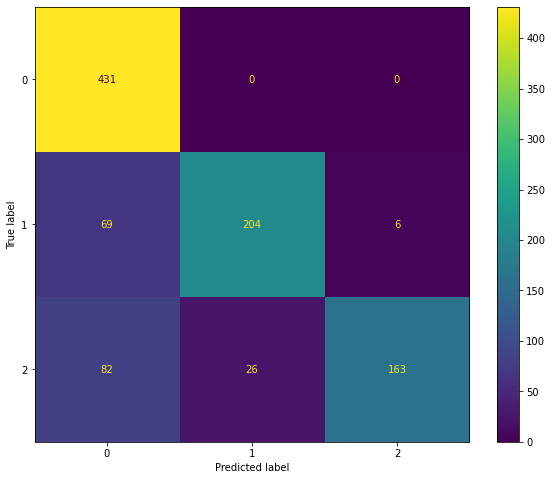

In [268]:
#Matrice de confusion
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(clf, X_test_feat, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

<div style="background-color: RGB(252,190,3);" >
<h2 style="margin: auto; padding: 10px;  ">LogisticRegression</h2>
</div> 

In [410]:
from sklearn.linear_model import LogisticRegression
# Construction du modèle
lr = LogisticRegression()

# Affichage des metrics 
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [411]:
# --------------------------  Entrainement du modèle  -------------------
lr.fit(X_train_feat, y_train)


LogisticRegression()

In [288]:
#Score du modèle
lr.score(X_test_feat, y_test) 

0.9378185524974516

In [413]:
# Les prédictions du modéle
predict_lr = lr.predict(X_test_feat)
predict_lr

array([1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2,
       0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0,
       2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2,
       0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       1, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 2,
       1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2,

In [414]:
#Test du modèle sur un article
lr.predict(X_test_feat[0])

array([1], dtype=int8)

In [271]:
# Score du modéle pour chaque classe 
precision_score(y_test,lr.predict(X_test_feat), average=None)

array([0.97235023, 0.8762215 , 0.95416667])

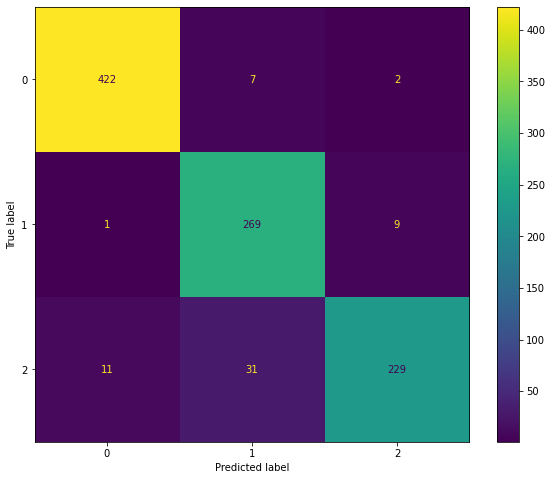

In [272]:
# La matrice de confusion des prédictions par LogisticRegression
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(lr, X_test_feat, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

In [415]:
#sauvegarde du modèle pour l'utilisation sur des articles inconnus du modèle
with open('logisticReg', 'wb') as model_lr:
    pickle.dump(lr, model_lr)

## Gridsearach pour améliorer les performances du modèle

In [360]:
# Grid pour tenter d'améliorer  les performances du modèle 
#les hyperparamètres 
params = {
    
    'C' : np.arange(1.4 , 2, 0.1),
    'max_iter': np.arange(10, 110, 10)
}

In [361]:
# Le grid avec la crossvalidation 
grid_LR= GridSearchCV(lr, params, cv=5, verbose = 1)
grid_LR.fit(X_train_feat, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'max_iter': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             verbose=1)

In [362]:
# Les meilleurs paramètres
print(grid_LR.best_params_)
# Le meilleur score
print(grid_LR.best_score_)
# Le meilleur modèle
print(grid_LR.best_estimator_)

{'C': 1.8000000000000007, 'max_iter': 30}
0.9350340136054422
LogisticRegression(C=1.8000000000000007, max_iter=30)


In [ ]:
# ------------------------ Script automatisé ---------------------------------------

In [456]:
def predict(article):
    with open('mypipe', 'rb') as preprocesseur: 
        preprocessing = pickle.load(preprocesseur)
    article_feat = preprocessing.transform([article])
    with open('logisticReg', 'rb') as  model_lr:
        model = pickle.load( model_lr)
    predicted_label = model.predict(article_feat)
    return  predicted_label
 

In [457]:
#Test de la fonction sur des articles du test set !
article = X_test['article'][0]
article

'Tribune. La guerre en Ukraine suscite un élan de générosité sans précédent. Des centaines de Français traversent spontanément les frontières pour aller chercher en voiture, en autocar, en train, des familles ukrainiennes fuyant les villes anéanties, leur distribuent des vivres, les soignent, les réconfortent, avant de les accueillir chez eux, non seulement dans leur pays, mais dans leurs propres maisons.Après deux années de crise sanitaire, de prudence généralisée, de contrôle ubuesque, où il nous a été interdit de sortir, interdit de voyager, interdit d’embrasser, interdit de partager, interdit d’accueillir chez soi au-delà du cercle familial le plus strict, où nous avons craint que les gestes élémentaires de notre humanité ne soient perdus à jamais, cette démonstration fracassante de solidarité ne vaut-elle pas d’être remarquée? Mieux encore, ce témoignage de courage et d’hospitalité arrive au beau milieu d’une campagne présidentielle où plusieurs candidats ont cherché à agiter les 

In [425]:
predict(article)

array([1], dtype=int8)

In [430]:
#Test sur un article du journal Le Télégramme
article_2 = df_Télégramme['article'][1]
article_2 

'Les horreurs de la guerre en Ukraine peuvent se lire dans les yeux du petit Volodymyr, 13 ans, allongé sur un lit de l’hôpital pour enfants d’Okhmatdyt à Kiev, avec son ballon vert en forme de chien. Son père et son cousin ont tous les deux été tués quand leur voiture a été criblée de balles, à peine deux jours après le début de l’invasion russe. Touché à la mâchoire, au dos, au bras et à la jambe, Volodymyr a miraculeusement survécu.«Il ne peut toujours pas marcher, mais les médecins lui ont dit que ce serait pour bientôt», explique sa mère, Natalia, 34 ans, exténuée par les événements.Avant la guerre, comme nombre de jeunes adolescents de son âge, il aimait jouer sur son téléphone et promener leur chien, raconte-t-elle. Aujourd’hui, le voilà cloué dans un lit d’hôpital. Une grosse balafre remonte de sa mâchoire jusqu’à une mèche de cheveux teints en blond qui tombe sur son visage. Il murmure péniblement qu’il va «bien».Sur une photo montrée sur un téléphone portable, on voit sa bles

In [429]:
predict(article_2)

array([2], dtype=int8)

###   Scrapping nouveaux article, Le Monde,  pour tester le modéle sur des articles inconnus

In [431]:
# Scrappig des articles du jour sur la page internationnal du Monde
links=[]
url= 'https://www.lemonde.fr/international/' 
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(req).read()
page = bs4.BeautifulSoup(html, 'html.parser')

for i in  page.findAll('div', {'class' : 'thread'}):
    links.append(i.find('a').get("href"))
        
list_test=[]
for link in links:
    req = Request(link, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
    page = bs4.BeautifulSoup(html, 'html.parser')

    title = page.find('h1').getText()
    article=""
    for t in  page.findAll("p", {'class': "article__paragraph"}):
        article += t.text.replace('\xa0','') 
        article = article.replace('\n', '')
        article = article.replace('\t', '')
    length=len(article.split())
    if length < 20:
        print(title, length)
    elif length >=20:
        list_test.append((article))

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [432]:
#Le premier article de la liste
article_test =  list_test[0]
article_test

'Devenue une entité supranationale de plus en plus forte, l’Union européenne (UE) est souvent perçue comme capable d’imposer ses règles, même quand les Etats membres s’y opposent. Interdiction des pailles, étiquetage des denrées alimentaires, règles de concurrence, politique énergique et environnementale…, l’Europe est également très présente dans le quotidien de la population française. Pourtant, malgré son importance et son omniprésence, elle intéresse peu, voire pas du tout.A quatre jours du premier tour de l’élection présidentielle, Le Monde organisera, le 6avril, une journée spéciale consacrée à l’Union européenne et à sa place dans la vie des Français et des Françaises, aujourd’hui et demain.En amont de cette journée spéciale, nous souhaiterions vous entendre, recueillir vos témoignages, vos histoires, vos avis, vos impressions. Pour vous, l’Europe, c’est quoi? Que signifie pour vous le projet européen? Quel sens lui donnez-vous?A quoi ressemblerait votre Europe dans les années à

In [433]:
predict(article_test)

array([1], dtype=int8)

<div style="background-color: RGB(232, 252, 3);" >
<h3 style=" padding: 10px;  "> On peut tester le script qui permert de déterminer la source d'un article dans le fichier main.py.
Si on ne peut pas utiliser un noteboook : On peut également à partir de ce fichier , entrainer le modéle à partir des données scrappées et le sauvegarder. Il suffit de décommenter le code ds la partie entrainement du modéle.
On peut ensuite tester les prédictions ds le fichier test_script
</h3>  
</div>   